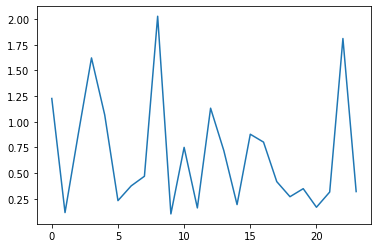

In [7]:
## To calculate and display image from a text embedding. ##


import torch
from model import STAGE1_G as G1
from model import STAGE2_G as G2
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import pickle


with open("lossfile.pickle","rb") as f:
    losses=pickle.load(f)
plt.plot(losses["Loss_D"])


generator = G1()
path_pretrained = '../output/abc/Model/netG_epoch_100.pth'
generator.load_state_dict(torch.load(path_pretrained, map_location='cuda:0'))
generator.cuda()

# batchsize = 1
# nz = 100
# with torch.no_grad():
#     generator.eval()
#     noise = Variable(torch.FloatTensor(batchsize, nz)).cuda()
#     noise.data.normal_(0, 1)
#     #noise = noise.cuda()
#     input = torch.rand(batchsize, 1024)
#     input = input.cuda()
#     _, fake_img, mu, logvar = generator(input, noise)
#     print(fake_img.shape)
#     plt.imshow(fake_img[0].permute(1,2,0).cpu())


generator2 = G2(generator)
path_pretrained = '../output/abc2/Model/netG_epoch_24.pth'
generator2.load_state_dict(torch.load(path_pretrained, map_location='cuda:0'))
generator2.cuda()

batchsize = 1
nz = 100
with torch.no_grad():
    generator2.eval()
    noise = Variable(torch.FloatTensor(batchsize, nz)).cuda()
    noise.data.normal_(0, 1)
    #noise = noise.cuda()
    input = torch.rand(batchsize, 1024)
    input = input.cuda()
    s1_img, fake_img, mu, logvar = generator2(input, noise)
    #print(fake_img.shape)
    #plt.imshow(fake_img[0].permute(1,2,0).cpu())
